**TODO**
1. Написать когда по 4 сигналам прогнозируем 5ый. 

In [1]:
import pandas as pd

https://curiousily.com/posts/time-series-forecasting-with-lstm-for-daily-coronavirus-cases/ 

In [1]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from importlib import reload

import sys
sys.path.insert(1, './DL-anomaly-detection')



%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()





device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


import random
def set_determenistic(seed=777,precision=10):
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.set_printoptions(precision=precision)

set_determenistic()

cuda:0


In [2]:
data_path = './data/'

In [3]:
%%time
df = pd.read_csv(data_path+'household_power_consumption.txt',sep=';')
df['Datetime'] = df['Date']+ ' ' + df['Time']
df.index = pd.to_datetime(df['Datetime'])
df = df.drop(['Date','Time','Datetime'],1)

for col in df:
    df[col]=pd.to_numeric(df[col], errors='coerce')
df = df.dropna()
df.head(3)
dff  = df.copy()

<string>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 2min 14s


In [4]:
df= dff[:1495]

In [85]:
import models, src, main,stastics,generate_residuals

src = reload(src)
models = reload(models)
generate_residuals = reload(generate_residuals)
stastics = reload(stastics)
main = reload(main)


In [94]:
dfs = df.copy()
a = main.LSTM_forecaster()


Epoch: 01
	Train Loss: 0.265
	 Val. Loss: 0.318 
Epoch: 02
	Train Loss: 0.225
	 Val. Loss: 0.280 
Epoch: 03
	Train Loss: 0.192
	 Val. Loss: 0.245 
Epoch: 04
	Train Loss: 0.162
	 Val. Loss: 0.211 
Epoch: 05
	Train Loss: 0.130
	 Val. Loss: 0.171 
Epoch: 06
	Train Loss: 0.097
	 Val. Loss: 0.124 
Epoch: 07
	Train Loss: 0.071
	 Val. Loss: 0.089 
Epoch: 08
	Train Loss: 0.061
	 Val. Loss: 0.076 

Весь X_test не помещается в память, тестим усреднением по батчам
Test Loss: 0.091


C:\Users\kompn\anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([64, 4, 7])) that is different to the input size (torch.Size([64, 1, 7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\kompn\anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([41, 4, 7])) that is different to the input size (torch.Size([41, 1, 7])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


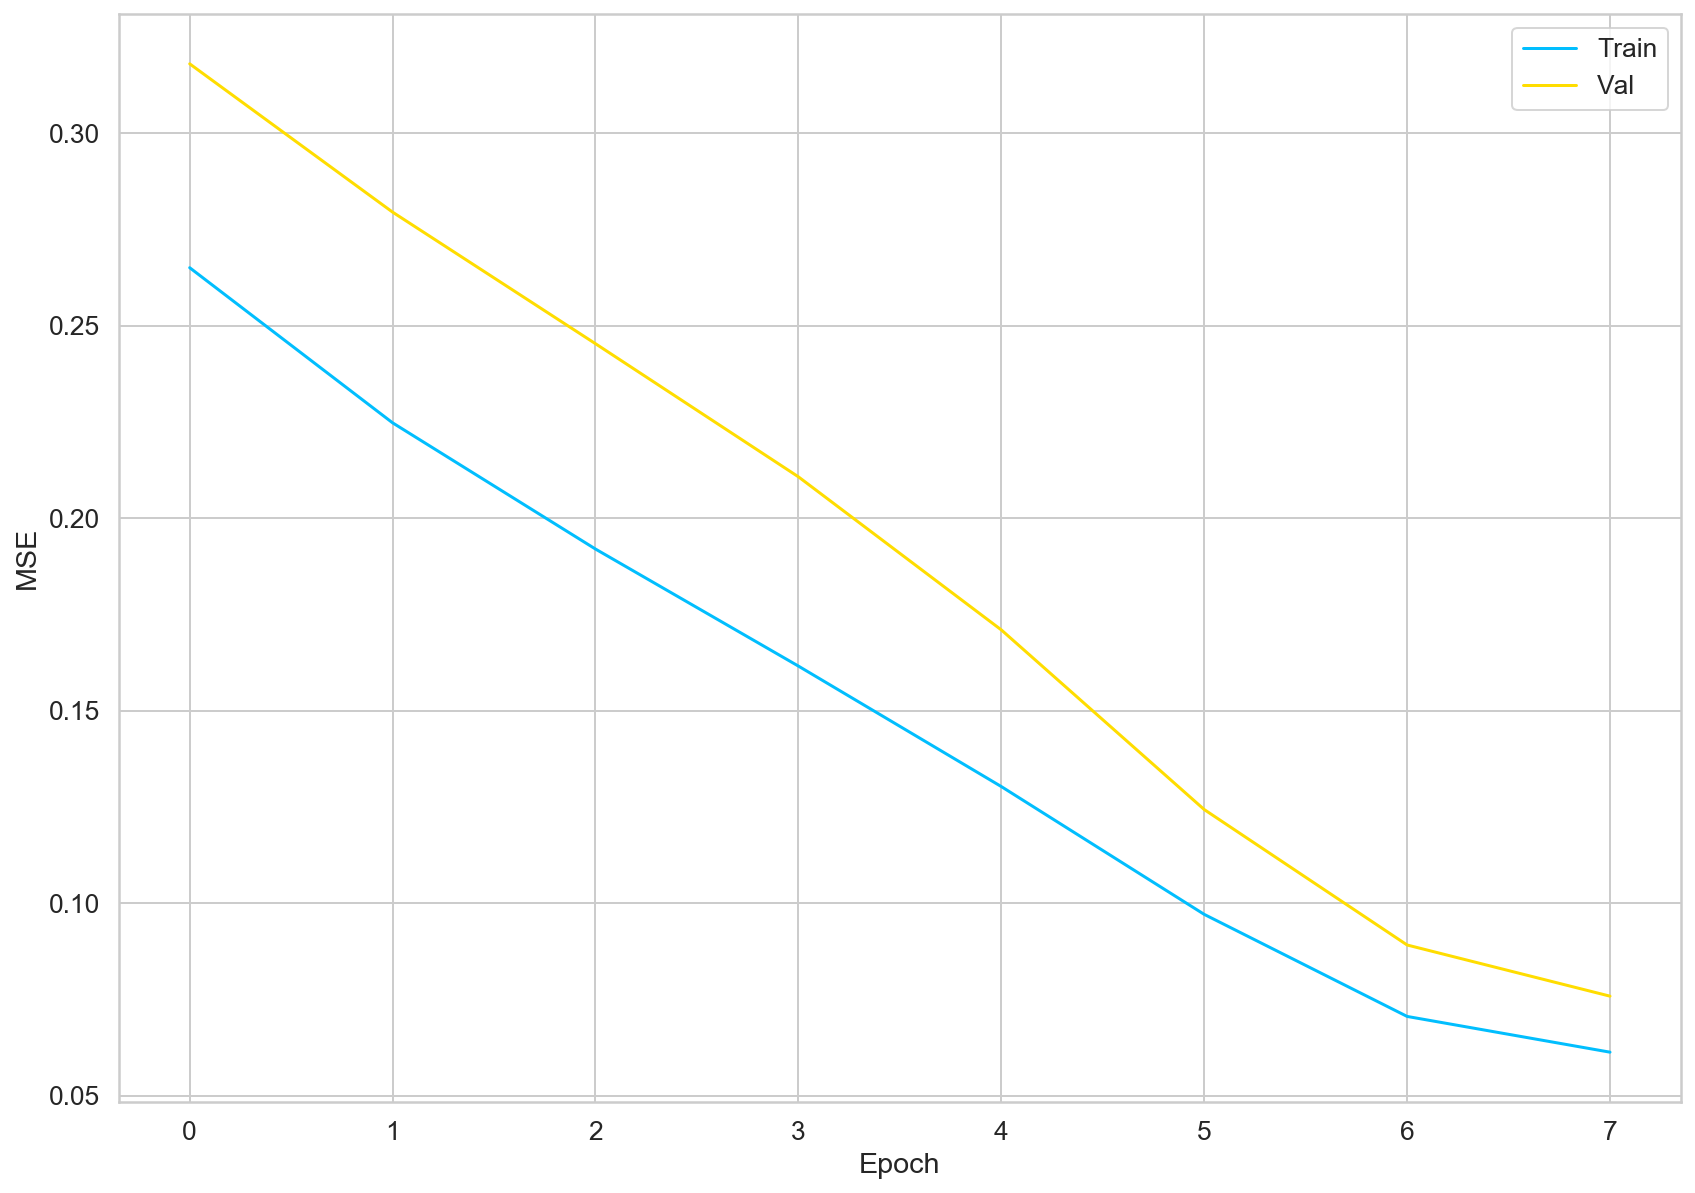

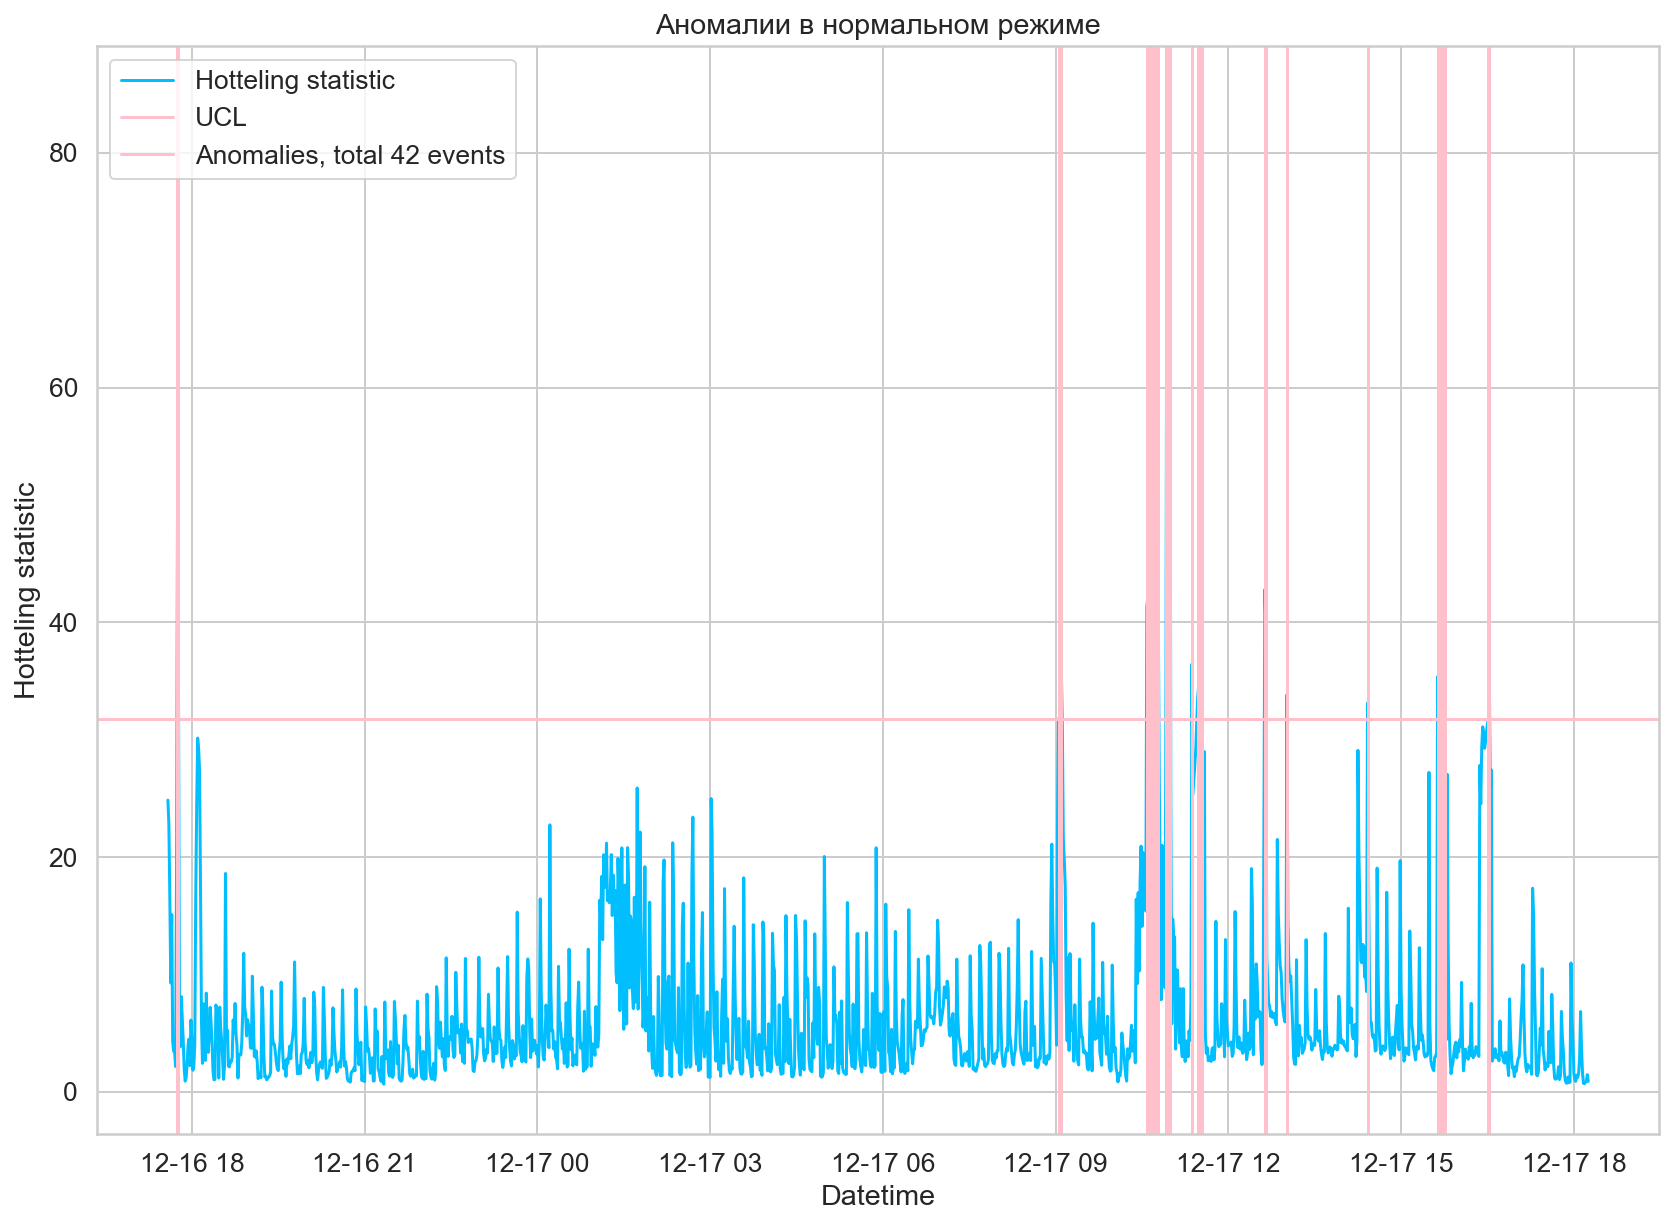

In [95]:
dd = a.fit(dfs,n_epochs=8,
          generate_res_func = generate_residuals.generate_res_func,
          res_analys_alg=stastics.hotteling(),
           points_ahead=4)

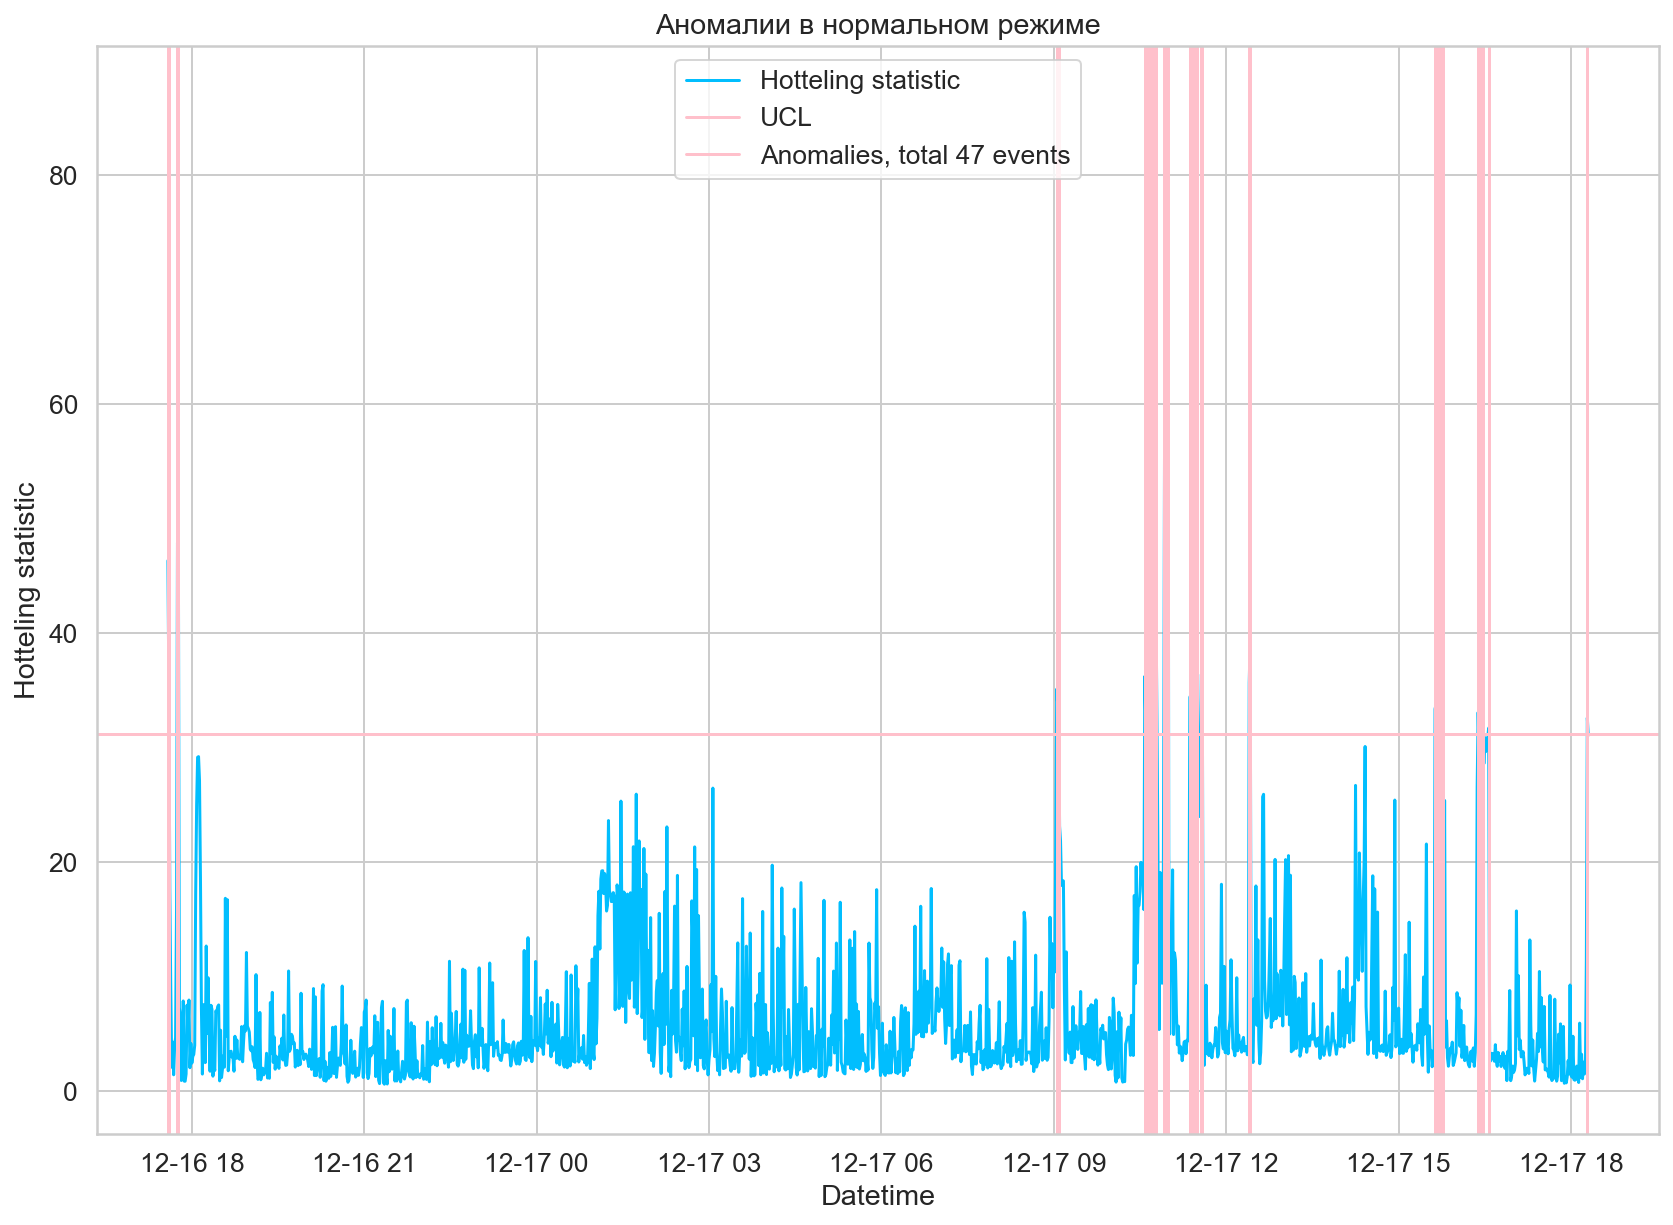

In [96]:
b= a.predict_anomaly(dfs)

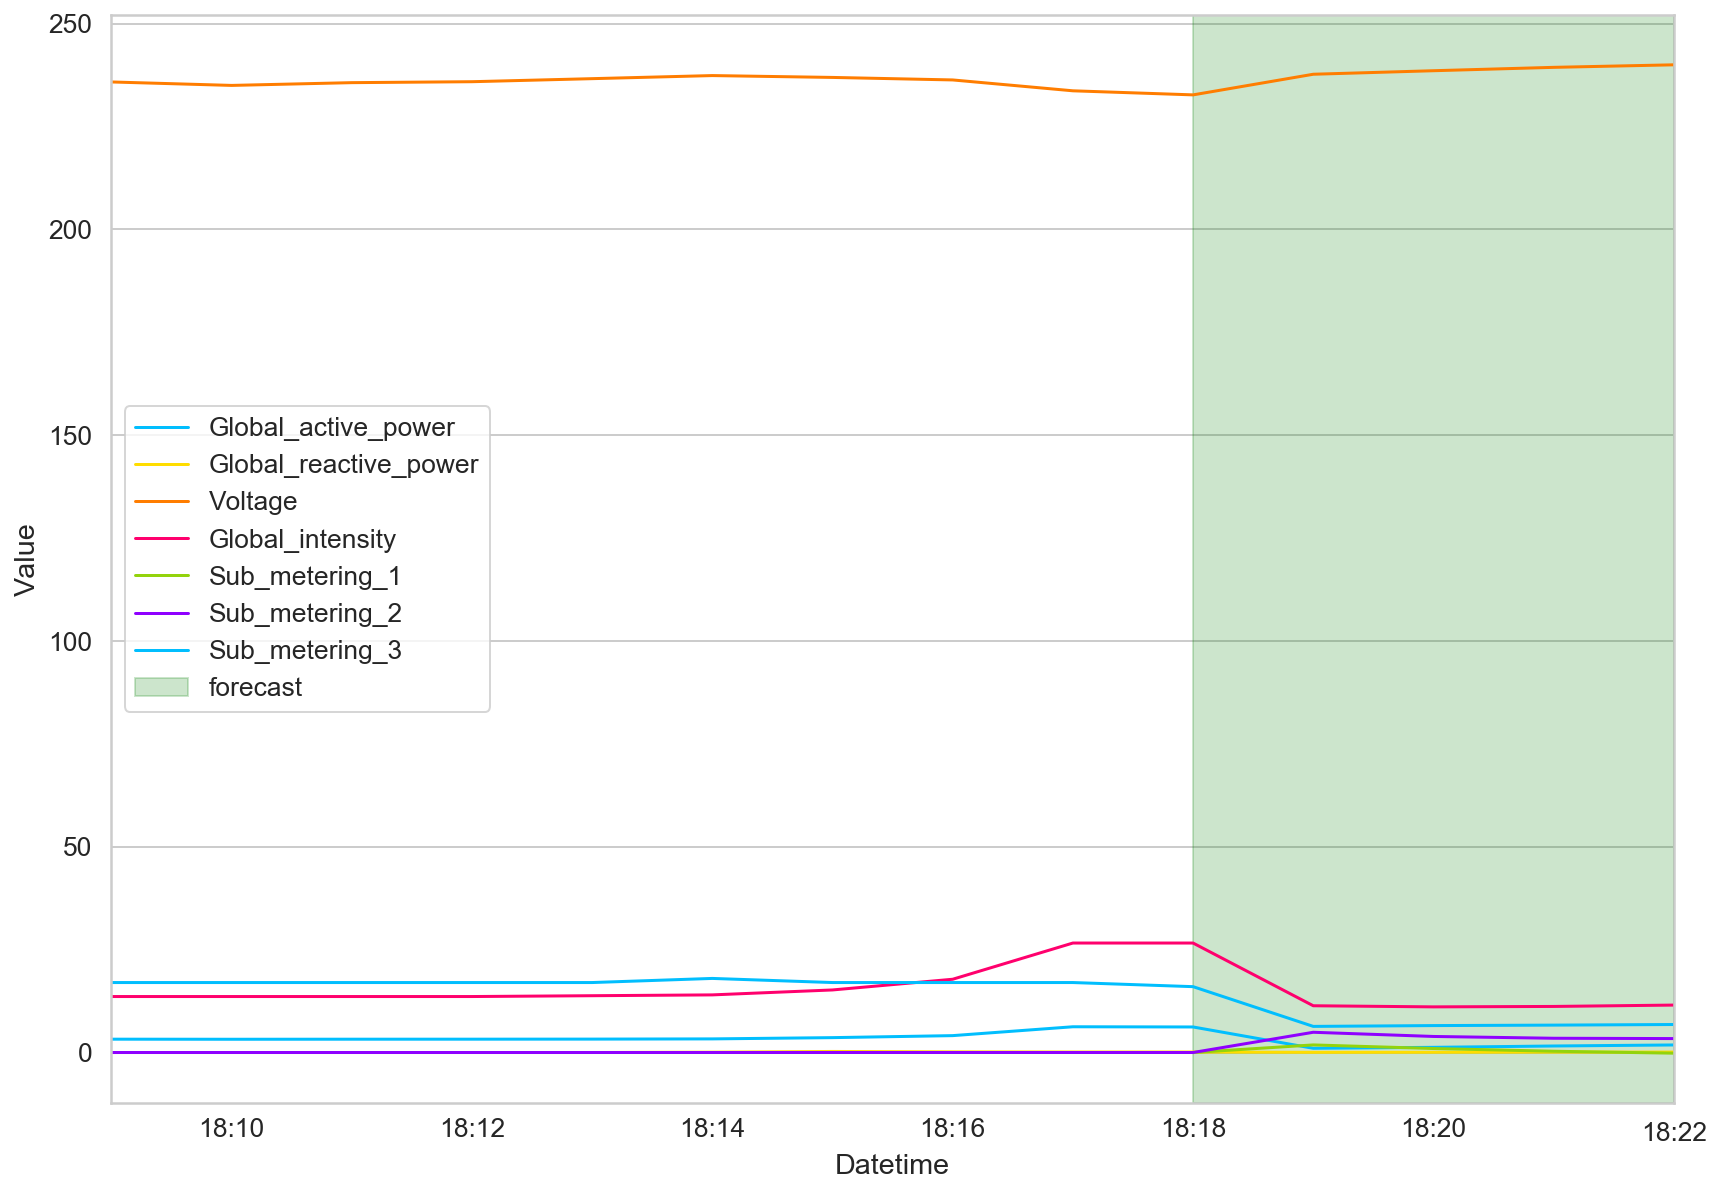

In [97]:
b= a.forecast(dfs)

In [28]:
from sklearn.model_selection import train_test_split 

In [25]:
ss = [df[0:10] for i in range(50)]

In [80]:
qw = train_test_split(ss,ss)[3]

In [83]:
type(qw)

list

In [35]:
src = reload(src)


In [ ]:
b= np

In [62]:
a = [2,2,2,2,3,423,3]
a[0]

2

In [19]:
X = a1[0]

In [44]:
df.values.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'